In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

# Load Dataset
- hdb_transaction_coordinates.csv
- check how the dataset looks like
- check the shape of the dataset

In [14]:
file_path = 'data/modified/hdb_transaction_coordinates.csv'

df = pd.read_csv(file_path)

columns_to_drop = ['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y']
df.drop(columns=columns_to_drop, inplace=True)

In [15]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,latitude,longitude
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,1.375097,103.837619
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,1.373922,103.855621
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4,1.373552,103.838169
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10,1.367761,103.855357
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10,1.371626,103.857736


In [16]:
df.shape

(37153, 14)

# Data Exploration and Visualization

## Pairplot for numerical variables

/Users/javian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/javian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/javian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/javian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

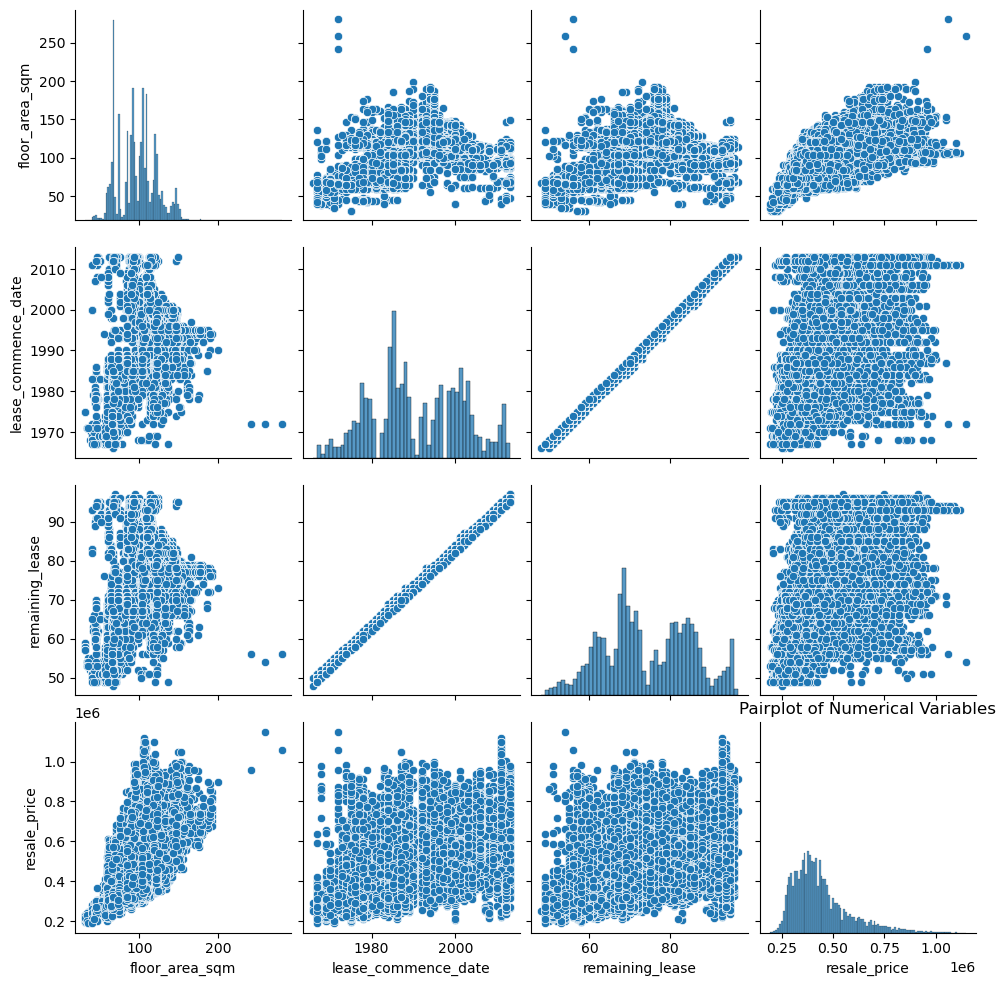

In [17]:
sns.pairplot(df[['floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'resale_price']])
plt.title('Pairplot of Numerical Variables')
plt.show()

## Distribution of resale prices

/Users/javian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


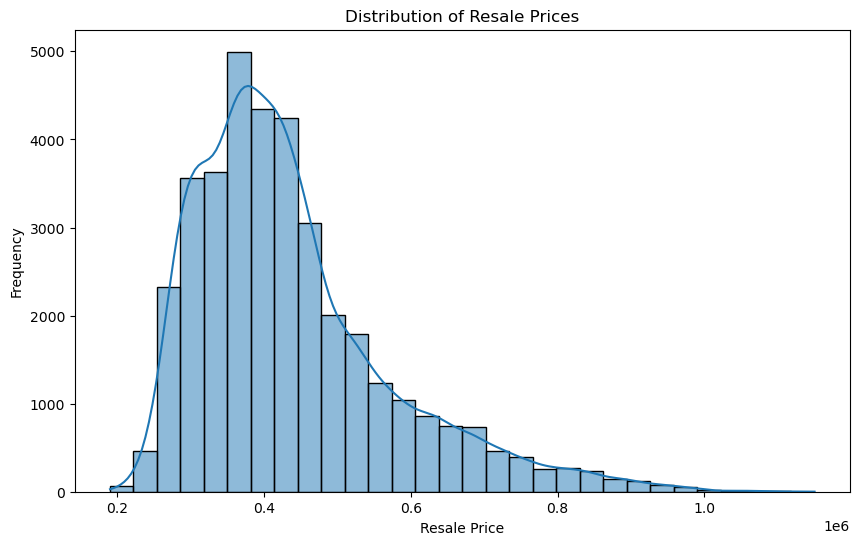

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], bins=30, kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of resale prices by town

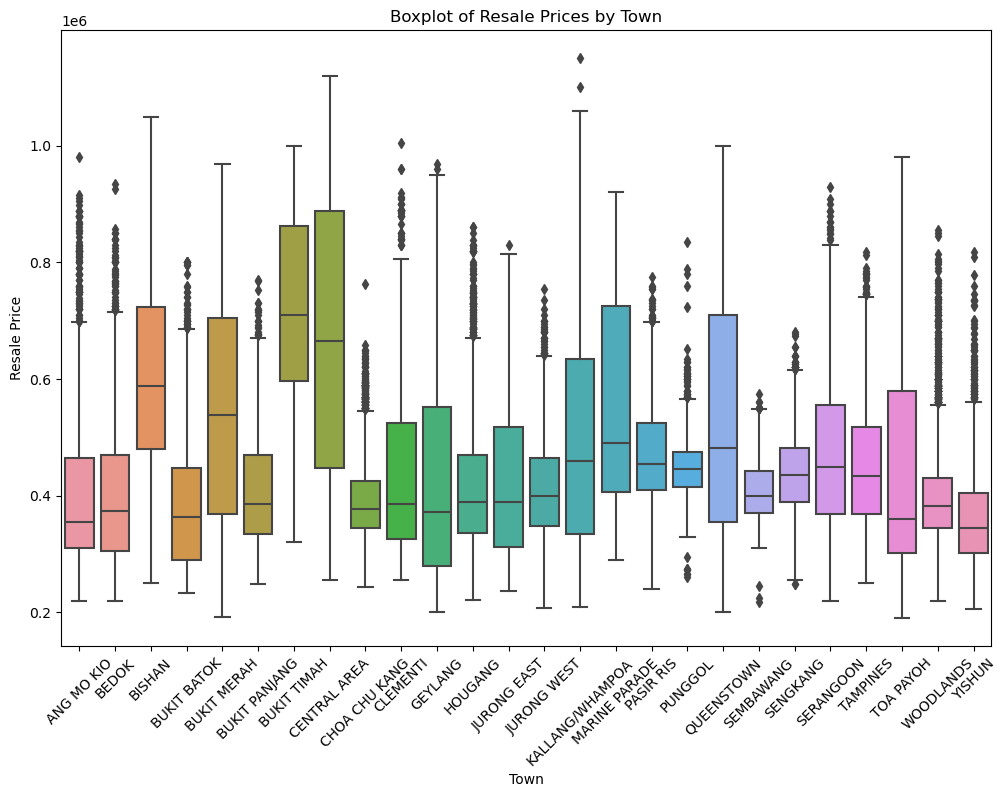

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='town', y='resale_price', data=df)
plt.title('Boxplot of Resale Prices by Town')
plt.xticks(rotation=45)
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.show()

## Heatmap for correlation matrix

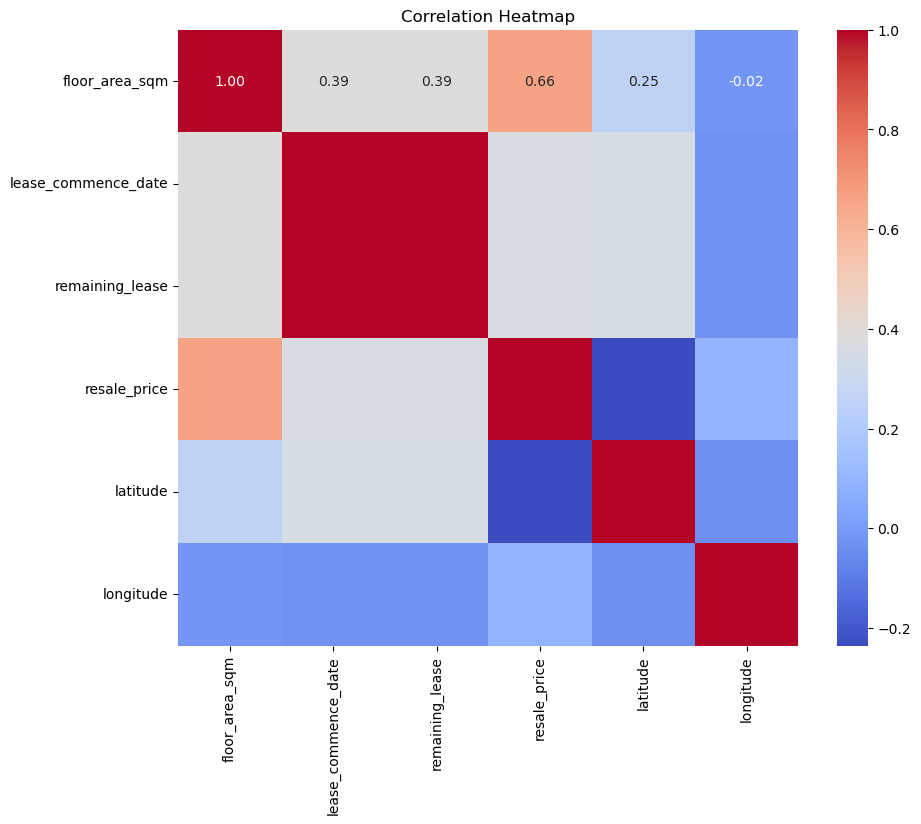

In [20]:
numeric_columns = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'resale_price', 'latitude', 'longitude']
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Check Data Statistics

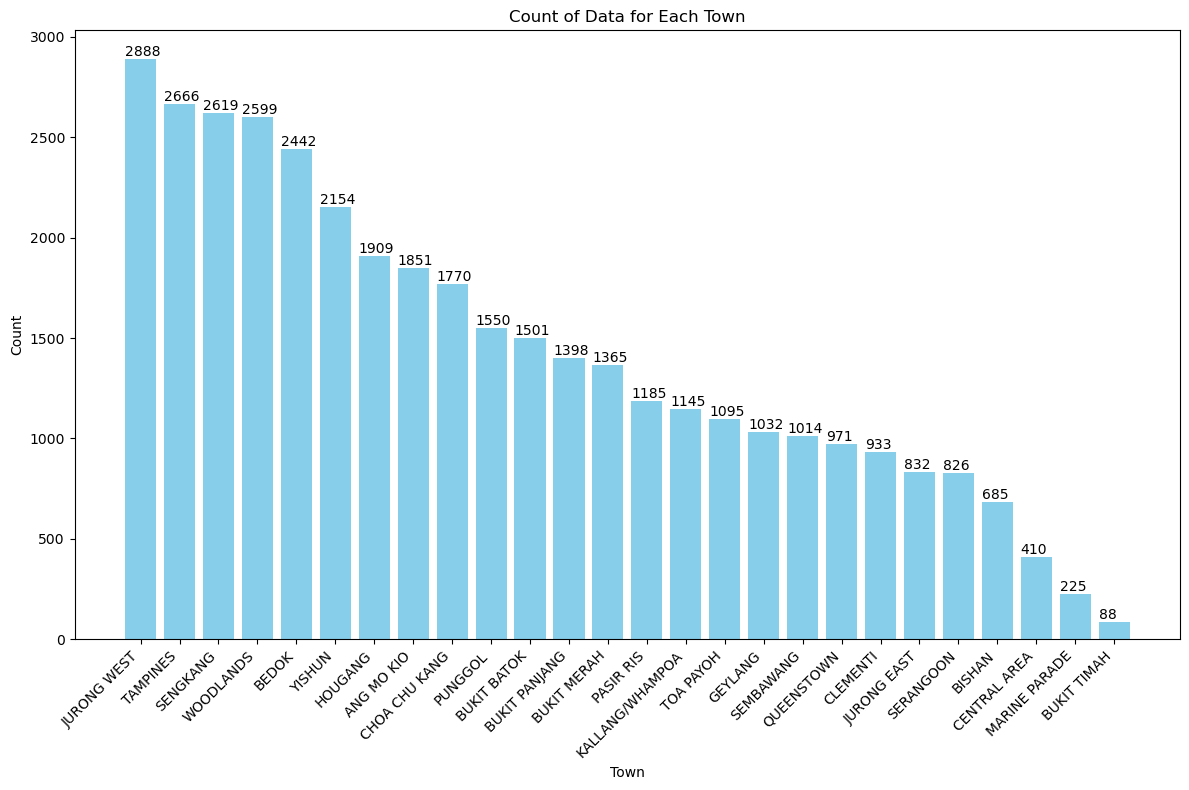

In [21]:
town_counts = df['town'].value_counts().reset_index()
town_counts.columns = ['Town', 'Count']

plt.figure(figsize=(12, 8))
bars = plt.bar(town_counts['Town'], town_counts['Count'], color='skyblue')
plt.title('Count of Data for Each Town')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, int(yval), va='bottom')

plt.tight_layout()
plt.show()

# Viewing the Map